In [30]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


In [87]:
#read dataset and convert into dataframe

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
data.drop(['PassengerId'],axis=1,inplace=True)

In [89]:
#dropping unnecessary feature

data.drop(['Ticket'],axis=1,inplace=True)
data.drop(['Cabin'],axis=1,inplace=True)
data.drop(['Name'],axis=1,inplace=True)

In [90]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped

In [91]:
data.shape

(891, 8)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [98]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

we will use sklearn’s SimpleImputer and apply it to the Age column. It will replace missing data with the average value of the column

In [94]:
#imputing the null values using imputer

imp = SimpleImputer(strategy='mean')
data['Age'] = imp.fit_transform(data['Age'].values.reshape(-1, 1) )

data['Age'].isna().sum()


0

In [96]:
from statistics import mean

In [97]:
#filling nan for the column embarked when you have string datatype

data.Embarked = data.Embarked.fillna('none')
data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


As we havecategorical column(sex and embarked) we need to convert into numerical data using encoding method 

In [80]:
from sklearn.preprocessing import OrdinalEncoder

In [99]:
data['Embarked'].unique()

array(['S', 'C', 'Q', 'none'], dtype=object)

In [100]:
ord_encoder = OrdinalEncoder(categories=[['S','C','Q','none']])
data1= ord_encoder.fit_transform(data[['Embarked']])
data1

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [101]:
data['Embarked'] = data1
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0.0
1,1,1,female,38.0,1,0,71.2833,1.0
2,1,3,female,26.0,0,0,7.9250,0.0
3,1,1,female,35.0,1,0,53.1000,0.0
4,0,3,male,35.0,0,0,8.0500,0.0


In [102]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [103]:
ord_encoder = OrdinalEncoder(categories=[['male','female']])
data2 = ord_encoder.fit_transform(data[['Sex']])
data2


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [104]:
data['Sex'] = data2
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,0.0
1,1,1,1.0,38.0,1,0,71.2833,1.0
2,1,3,1.0,26.0,0,0,7.9250,0.0
3,1,1,1.0,35.0,1,0,53.1000,0.0
4,0,3,0.0,35.0,0,0,8.0500,0.0


In [105]:
#we have filled all the null values now and encoded it 

data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [107]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.368126
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.647601
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


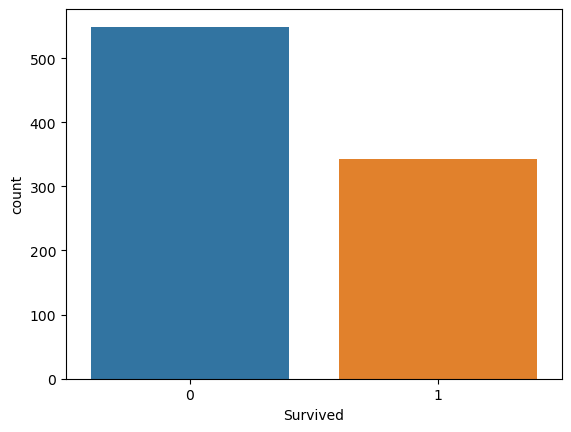

In [111]:
sns.countplot(x='Survived',data=data)
plt.show()

In [ ]:
We can see that less no of people have survived and more no are dead

In [112]:
cor = data.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.118026
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.028566
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.128526
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.023578
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.063794
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.082144
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.071010
Embarked,0.118026,0.028566,0.128526,0.023578,-0.063794,-0.082144,0.071010,1.000000


Now the data is cleaned and it looks like it is balanced and there is no such huge variation

PLOTTING HEATMAP TO CHECK THE MULTICOLLINEARITY

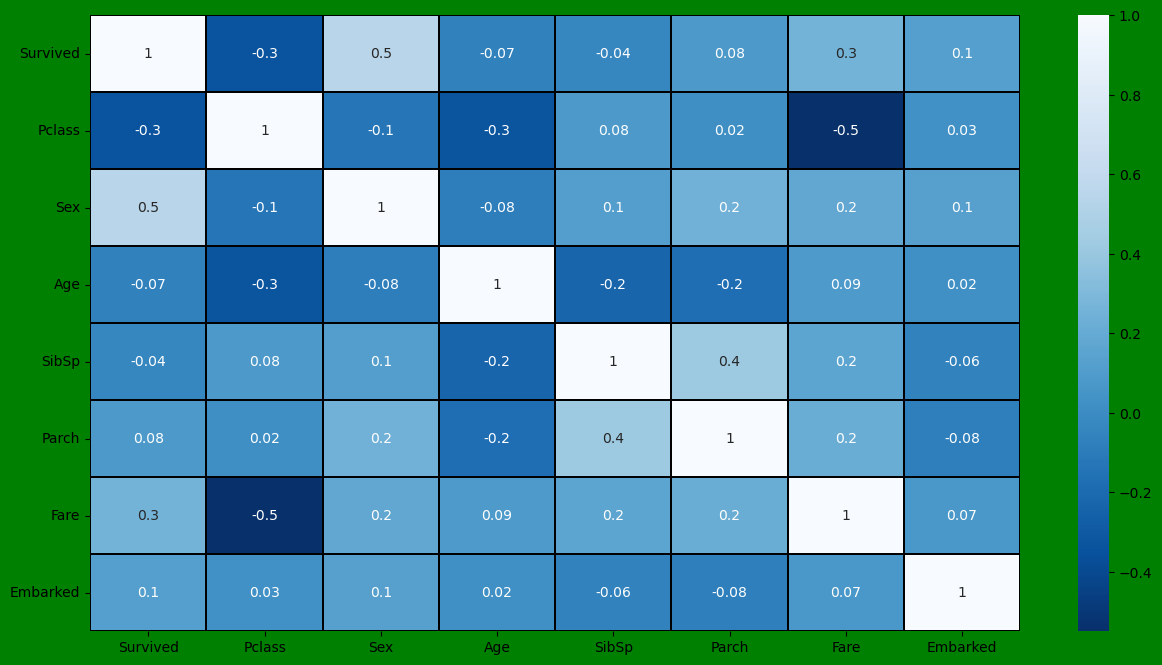

In [113]:
plt.figure(figsize=(15,8), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

sibsp and parch are bit correlated so we can drop one of the columns

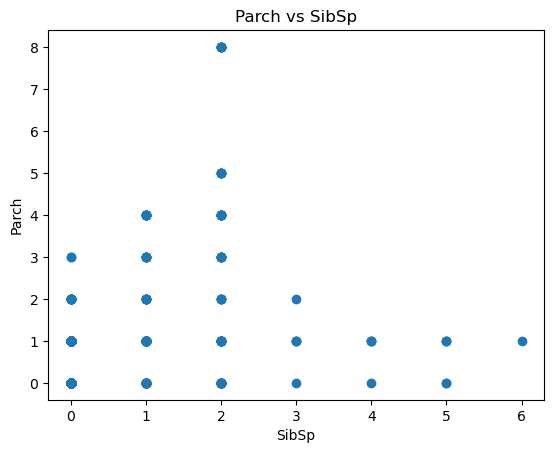

In [116]:
plt.scatter(data.Parch, data.SibSp)
plt.xlabel('SibSp')
plt.ylabel('Parch')
plt.title('Parch vs SibSp')
plt.show()

In [122]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,0.0
1,1,1,1.0,38.0,1,0,71.2833,1.0
2,1,3,1.0,26.0,0,0,7.9250,0.0
3,1,1,1.0,35.0,1,0,53.1000,0.0
4,0,3,0.0,35.0,0,0,8.0500,0.0


In [135]:
data.drop(['SibSp'],axis=1,inplace=True)

we can del one of them as Sibsp increases Parch also increases

In [137]:
x = data.drop('Survived', axis=1)
y = data.Survived

In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scalar = pd.DataFrame(scalar.fit_transform(x), columns = x.columns)
x

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,0.0,22.000000,0.000000,1.935438,0.000000
1,1,1.0,38.000000,0.000000,4.146318,1.000000
2,3,1.0,26.000000,0.000000,1.993730,0.000000
3,1,1.0,35.000000,0.000000,3.758647,0.000000
4,3,0.0,35.000000,0.000000,2.004158,0.000000
...,...,...,...,...,...,...
886,2,0.0,27.000000,0.000000,2.351335,0.000000
887,1,1.0,19.000000,0.000000,3.107233,0.000000
888,3,1.0,29.699118,1.259921,2.862294,0.000000
889,1,0.0,26.000000,0.000000,3.107233,1.000000


We are able to tackle the issue of biasness through standard scalar method

In [139]:
#building model to test unexposed data
x_train, x_test, y_train, y_test = train_test_split(x_scalar, y, test_size=0.25, random_state=355)

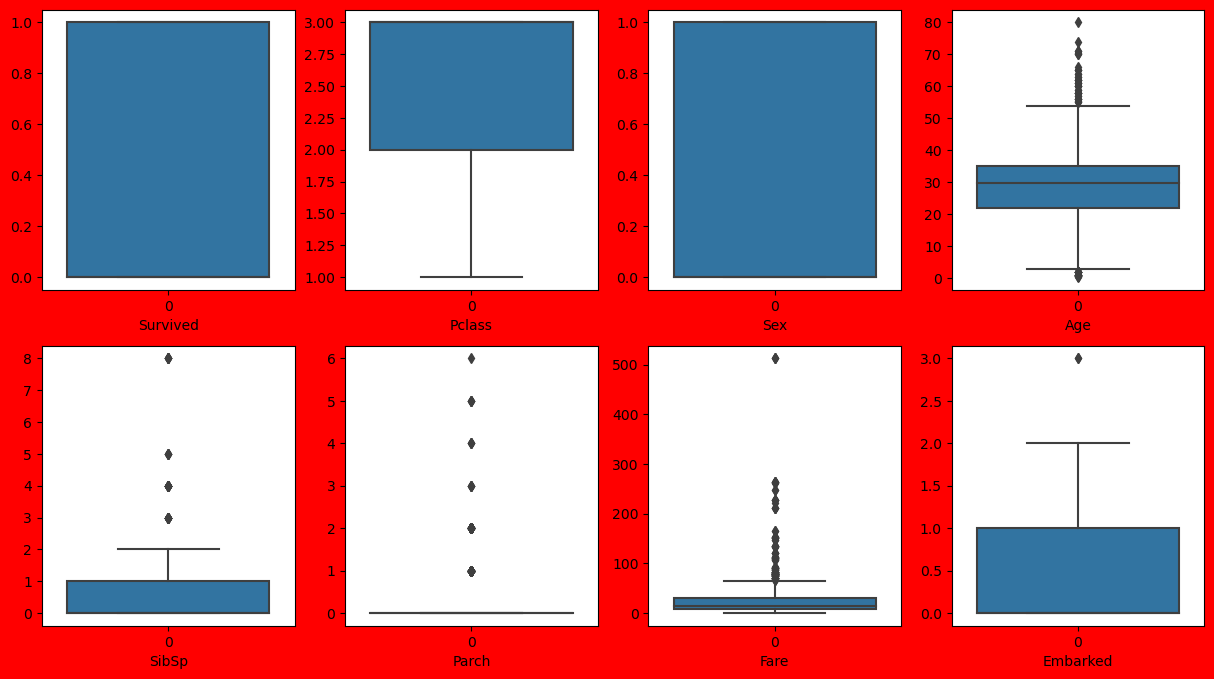

In [129]:
plt.figure(figsize=(15,8), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax = plt.subplot(2,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        
        
    plotnumber+=1
plt.show()

In [130]:
#we can see the data over here is skewed

data.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.581144
dtype: float64

In [131]:
data['SibSp']=np.cbrt(data['SibSp'])
data['Parch']=np.cbrt(data['Parch'])
data['Fare']=np.cbrt(data['Fare'])
data['Embarked']=np.cbrt(data['Embarked'])


In [132]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       1.033059
Parch       1.348334
Fare        1.230382
Embarked    1.060333
dtype: float64

we have removed the skewness using cube root method

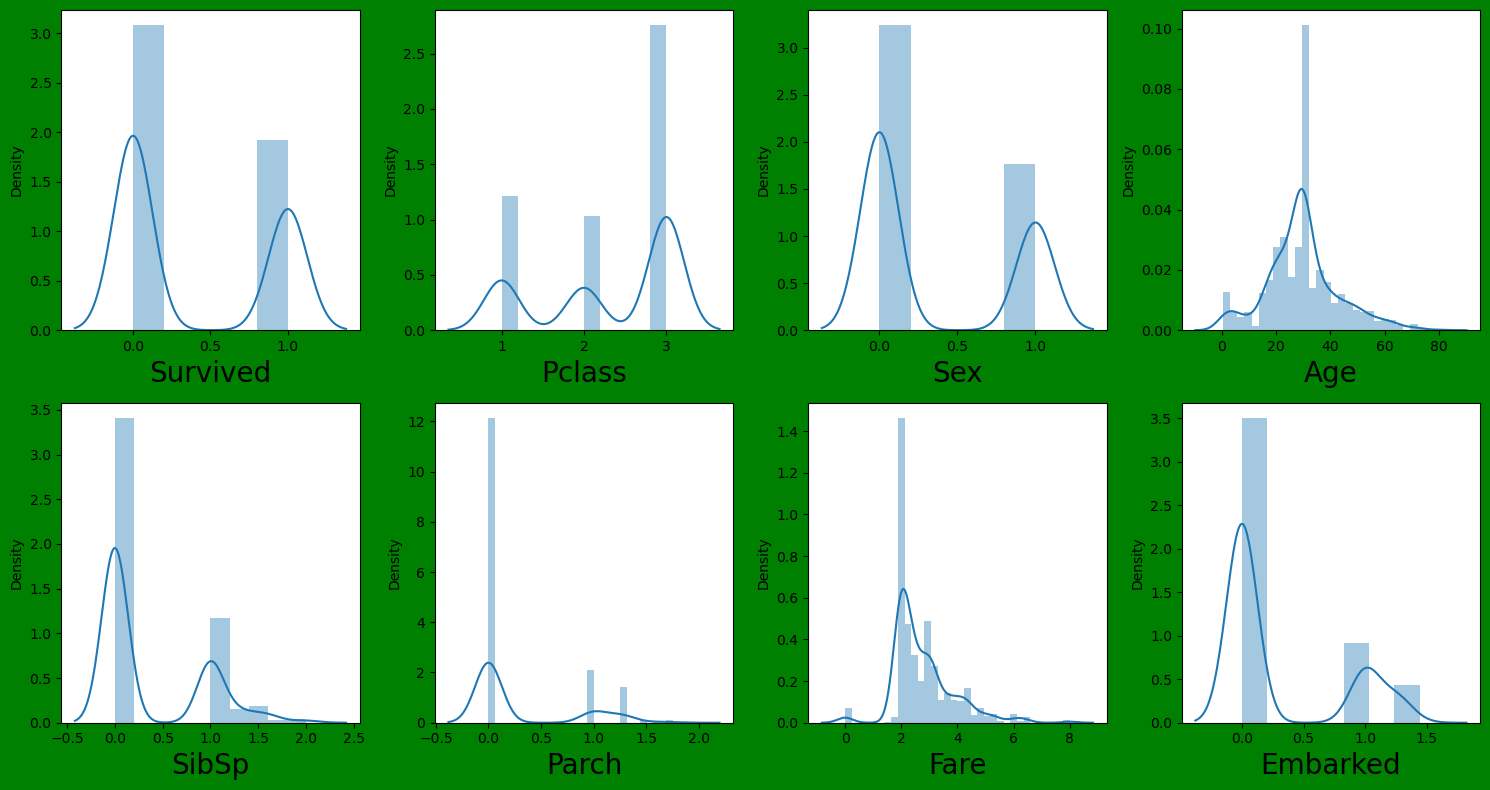

In [133]:
plt.figure(figsize=(15,8), facecolor='green')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [134]:
cor['Survived'].sort_values(ascending = False)

Survived    1.000000
Sex         0.543351
Fare        0.257307
Embarked    0.118026
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

In [140]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [142]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1 = SM.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [150]:
from sklearn.ensemble import RandomForestClassifier

maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is ", maxAccu,"on random_state",maxRS)

Best accuracy score is  0.8818181818181818 on random_state 38


In [146]:
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier



In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [152]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7798507462686567
[[132  24]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       156
           1       0.76      0.69      0.72       112

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [159]:
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print('Diff b/w accuracy score and cross validation score', accuracy_score(y_test, predET)-score.mean())

[0.75454545 0.80909091 0.78636364 0.9086758  0.87214612]
0.8261643835616438
Diff b/w accuracy score and cross validation score -0.0463136372929871


In [153]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8134328358208955
[[140  16]
 [ 34  78]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       156
           1       0.83      0.70      0.76       112

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.81      0.81       268



In [154]:
#cross validation score 

score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Diff b/w accuracy score and cross validation score', accuracy_score(y_test, predRFC)-score.mean())

[0.75909091 0.83636364 0.78636364 0.90410959 0.88584475]
0.8343545039435452
Diff b/w accuracy score and cross validation score -0.020921668122649617


In [155]:
knn = KNeighborsClassifier()

#model training
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [157]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f'Accuracy score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
    
    elif train==False:
        pred = clf.predict(x_test) #
        print(f'Accuracy score: {accuracy_score(y_test, pred) * 100:.2f}%')
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [158]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True) #training score
metric_score(knn, x_train, x_test, y_train, y_test, train=False) #testing score

Accuracy score: 83.31%
Accuracy score: 73.51%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       156
           1       0.75      0.54      0.63       112

    accuracy                           0.74       268
   macro avg       0.74      0.71      0.71       268
weighted avg       0.74      0.74      0.73       268



In [160]:
from sklearn import metrics

In [162]:
def falsepositiverates(fpr,tpr):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
    display.plot()

In [163]:
import joblib
joblib.dump(RFC, 'Survived.pkl')

['Survived.pkl']

In [165]:
RFC = joblib.load('Survived.pkl')

prediction = RFC.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [168]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a
data

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
263,1,0
264,0,1
265,0,0
266,0,0
